<a href="https://colab.research.google.com/github/DS3001/group10/blob/main/project_2/Project2_With_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2:
Betsy Altenburger, Autumn Boaz, Olivia Byram, Olivia Yang, Alex Yang**

**Summary**

For this project, our primary goal was to create an effective model that could predict whether a person has a stroke, using a provided dataset that contained both qualitative and quantitative traits of that individual. To define an effective model, we aimed to achieve the lowest root mean square error (RMSE) possible for the testing data. Given a simple linear model that contained some polynomials and dummy variables, we utilized its R-squared of 0.087 and RMSE of 0.206 as reference for our model. To begin, our group individually created models based on our own observations and strategies and then combined different aspects of each model to create our final one. The purpose of this was to see if utilizing diverse perspectives on the approach to the question, then working together to combine our ideas, was overall more effective than an individual model. The individual models were a combination of linear regression, regression/classification trees, k-nearest neighbor, and polynomial expansions. We chose the models with the lowest RMSE  then used context from them to decide which variables and expansions to use in our final ‘supermodel’. The data had been cleaned from the previous individual models, we converted most of the variables into dummy variables for simplicity. We also ensured that we removed any NaN’s that would cause skewed data distributions and replaced them with the mean. Our final model gave us an R-squared of 0.09563359799605275 and RMSE of 0.2050397191782437. This model was the linear regression model with polynomial expansion.


**Data**

*For the sake of this ipynb not being extremely long, we did not include the data cleaning for every single model we created. If you would like to see those, they are included in the folder. For example, Autumn's data cleaning is included with her model code in the project 2 folder under "ABoaz_ModelFP". The data cleaning for the final, combined model is included in the results section.*

Given that there were different models combined to develop a final model with the lowest RMSE value, there were a few different approaches to reading, cleaning, and preparing the data. The first step for all models was to use the “.head()” function to take a look at all of the variables in the data step. Unnecessary columns were removed, specifically ‘Unnamed: 0’ and “id”.  From there, the “isna().sum()” function was utilized to see how many na values were in each variable and the “.fillna()” function was used to replace the missing values with the average value of the column--this method was used for ‘bmi’.

For the first approach, we mapped phrases from categorical variables to a numerical form. Specifically, using the “.replace()” function, the variables ‘ever_married’, ‘gender’, ‘smoking_status’, ‘Residence_type’, and ‘work_type’ were transformed to have numerical values that correlated with the original categories. For example, for ‘smoking_status’, the values were converted as follows: {"never smoked":0, "formerly smoked":1, "smokes":2, "Unknown":3}. Depending on the model created, other variables may have been dropped or changed, but they will be discussed further in the results section.


The second approach utilized a windorizing function to account for the skew of data in certain variables, so the data preparation process was slightly different. Using a scatter plot to look at the spread of data and notice which variables had outliers, the ‘avg_glucose_level’ had the greatest number of outliers with ‘bmi’ following in the trend. Both variables were first converted to the integer type before further analysis proceeded.

Even after windorizing ‘avg_glucose_level’, this variable was much larger than the other variables. The best way to deal with this is to take the inverse hyperbolic sine of ‘avg_glucose_level’ and save this variable as ‘avg_glucose_level_ihs’.

The remaining cleaned variables were then sectioned into training and testing sets to be used in the model, named respectively as ‘X_train’, ‘y_train’, ‘X_test’, and ‘y_test’.


For the overall model which was a combination of all the data cleaning tools each group member used, we used all of these data wrangling tactics discussed above. Windorizing was only used by one group member, but the other models from other group members ran with the winsorized data they performed better. This showed that our idea of separate model building to achieve the lowest RMSE was a good approach.

**Results**

*Again, in the interest of not making this file too large, we decided to only include the code for our combine model. The code for the other models is included in the project 2 folder.*

To begin constructing the model, all necessary packages were first imported. From the data preparation, the variables were fitted to a basic linear model using the “LinearRegression().fit()” function and predictions were made for the test data using “reg.predict()”. The base R-squared was found to be 0.188, using the “reg.score()” function and the base RMSE was 0.194.

For one of the approaches, a linear regression model utilizing expanded polynomials was created (the code for this approach is found in the file "ABoaz_ModelFP.ipynb"). The function “poly_expand” was created for the expander process, taking an input of ‘dat’ and expanding it to have polynomial features up to a specified degree of ‘deg’. The resulting features were then stored in the DataFrame ‘zdf’ and returned. From there, the function ‘lin_reg’ was created for the regression, using similar steps to the basic linear model from above. ‘Lin_reg’ took the parameters of ‘X_train’, ‘y_train’, ‘X_test’, and ‘y_test’. Utilizing scikit-learn’s ‘LinearRegression’ class, the function trains a linear regression model utilizing the provided training data which was then used to predict the target values ‘y_hat’ for the test data. The function also calculated and returned R-squared and the RMSE value. The linear regression model was then run with a degree of 2 and then , using “poly_expand” to expand the “X_train” and “X_test” sets. The outputs had an R-squared of 0.078 and RMSE of 0.207 for both degrees of 2 and 3.

The next team member took a similar approach (the code for this model is found in the file "Olivia_Yang_Model_FP.ipynb"). Upon applying the windsorizing function to the simple linear model that was provided, the  R2 had a slight increase of 0.088 though the RMSE remained 0.206. When applying this function to the linear regression model that contained polynomial features, the R2 value decreased to 0.077 and had an RMSE of 0.207, indicating that accounting for the outliers in the ‘avg_glucose_level’ and ‘bmi’ would not improve the predictive power of our linear regression model.


The final approach that only used linear regression is in the file "Betsy_Altenburger_Model.ipynb". Another approach using linear regression did not winsorize ‘bmi’ and ‘avg_glucose_level’; instead, it used the inverse hyperbolic sine of ‘avg_glucose_level.’ The ‘avg_glucose_level’ values are larger than the rest of the data set, so the idea was to make sure the scale of this variable did not dominate the linear model. The rest of the data was cleaned like the methods described above. The model with the lowest RMSE in this approach featured a polynomial expansion of degree one for the numeric variables: ‘age,’ ‘hypertension,’ ‘heart_disease,’ ‘avg_glucose_level_ihs,’ ‘smoking_status.’ The rest of the variables were converted to dummy variables and concatenated with the expanded data. This approach resulted in a R-squared of 0.08288 and a RMSE of 0.20648.

The next approach used multiple tools and models, found in the file "Olivia_Byram_Model_Proj2.ipynb". A classification decision tree was created. To do this, a decision tree classifier with a maximum depth of 5 was instantiated and trained using ‘X_train’ and ‘y_train’ datasets and visualized with scikit-learn’s ‘tree.plot_tree’. Once the model was trained, predictions were created using the test set ‘X_test’ and the residuals were calculated. Using a kernel density plot, we visualized the distribution of the residuals. A scatter plot was also created to compare predicted and true values. The findings showed that there was 0 variance for the dataset using this model and that the classification decision tree was not the best model to use for predictions.

From there, a k-nearest neighbor (KNN) regression model was utilized and evaluated for its predictive power. The input data was first normalized using a max-min normalization function that scaled the ‘X_train’ and ‘X_test’ datasets. The code was then iterated over a range of k to find the optimal k value. The sum of squared training errors were stored as ‘SSE’ and the lowest value was stored as ‘SSE_min’.

The final individual model is in the file "Copy_of_Alex_Yang_Project_2_Model.ipynb". A KNN classification  model was also utilized for variables ‘smoking_status’, ‘residence_type’, ‘hypertension’, and ‘heart_disease’. The input data was first evaluated and cleaned using the same methods as described in the data preparation section. Then, the data was normalized by maxmin function. A Scree Plot was created to determine the optimal number of k to use which end up being 9. After this step, the was fitted and evaluated which resulted in a R-squared of 0.9681818181818181 and a RMSE of 0.037986858819879316. This model was incorrect because it included the column 'stroke' in the training and testing data. As such, when it was used in the combined results, the RMSE was not as low.

Once all the individual models were created, we combined all the results into one file. We combined all the data cleaning techniques. The code below shows how the techniques were combined and applied to all the different model types used above.

In [54]:
! git clone https://github.com/DS3001/group10/

fatal: destination path 'group10' already exists and is not an empty directory.


In [55]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [56]:
df_train = pd.read_csv("./group10/project_2/data/training_data.csv")
df_test = pd.read_csv("./group10/project_2/data/testing_data.csv")

As stated above, our strategy was to have each group member develop their own model and then combine the techniques used to produce a combined model. Bagging was not allowed in this assignment, so by combined model, we mean combining the data wrangling techniques and types of models. First, the categorical string variables were mapped to discrete numerical values. Then, the variables ‘bmi’ and ‘avg_glucose_level’ were winsorized. Now, there are no outliers in the training or test data set. The variable ‘avg_glucose_level_ihs’ was added as the inverse hyperbolic sine of ‘avg_glucose_level.’

In [57]:
# Creating the test and train X and Y variables
y_train = df_train['stroke']
X_train = df_train.drop(columns = ['stroke','id','Unnamed: 0'],axis=1)
y_test = df_test['stroke']
X_test = df_test.drop(columns = ['stroke','id','Unnamed: 0'],axis=1)

The variables with string values are all mapped to numerical values, so sklearn functions can be used later in the code. The missing values for bmi are filled in with the mean. Both of these data cleaning techniques were used in most of the individual models

In [58]:
# Data cleaning

# We filled in the BMI NaN values with the mean
X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())


# Mapped all the string values to numerical values
X_train['ever_married'] = X_train['ever_married'].replace({"No":0, "Yes":1})
X_test['ever_married'] = X_test['ever_married'].replace({"No":0, "Yes":1})

X_train['gender'] = X_train['gender'].replace({"Male":0, "Female":1, "Other":2})
X_test['gender'] = X_test['gender'].replace({"Male":0, "Female":1, "Other":2})

X_train['smoking_status'] = X_train['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2,
                                                          "Unknown":3})
X_test['smoking_status'] = X_test['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2,
                                                          "Unknown":3})

X_train['Residence_type'] = X_train['Residence_type'].replace({"Urban":0, "Rural":1})
X_test['Residence_type'] = X_test['Residence_type'].replace({"Urban":0, "Rural":1})

X_train['work_type'] = X_train['work_type'].replace({"Private":0, "Self-employed":1, "children":2,
                                                          "Govt_job":3, "Never_worked":4})
X_test['work_type'] = X_test['work_type'].replace({"Private":0, "Self-employed":1, "children":2,
                                                          "Govt_job":3, "Never_worked":4})

<ipython-input-59-cdbd79dc3cdc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[x < lower_whisker] = lower_whisker
<ipython-input-59-cdbd79dc3cdc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[x > upper_whisker] = upper_whisker


<Axes: >

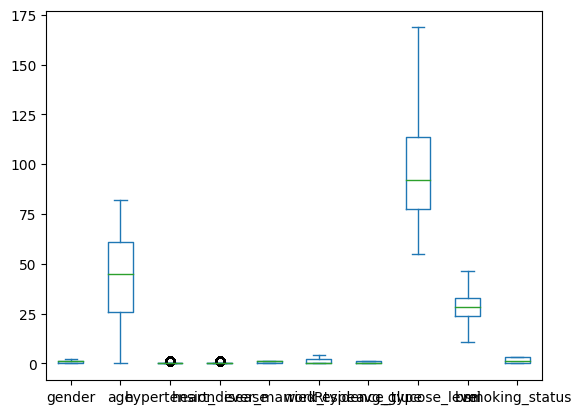

In [59]:

# one group member windsorized and it worked well so we implemented this for all the models
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

X_train['avg_glucose_level'] = windsorize(X_train['avg_glucose_level'])
X_train['bmi'] = windsorize(X_train['bmi'])

X_test['avg_glucose_level'] = windsorize(X_test['avg_glucose_level'])
X_test['bmi'] = windsorize(X_test['bmi'])


X_train.plot.box()

In [60]:
# another group member took the inverse hyperbolic sin of average glucose level
X_train['avg_glucose_level_ihs'] = np.arcsinh(X_train['avg_glucose_level'])
X_test['avg_glucose_level_ihs'] = np.arcsinh(X_test['avg_glucose_level'])


This combined model notebook contains several models because we combined all the data cleaning techniques used, and then we wanted to run them on all the different model ideas group members came up with. The basic linear model with no polynomial expansion resulted in an RMSE of 0.207 and R2 of 0.0774. This is worse than the base model given for this project. The next model approach features polynomial expansion to build on this model.

In [61]:
# basic linear model with no variable expansion only the changes made above
reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)

#calculating r-squared
rsqu = reg.score(X_test, y_test)
print("R-Squared: ", rsqu )
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )

R-Squared:  0.07738621987516936
RMSE:  0.2070979295371842


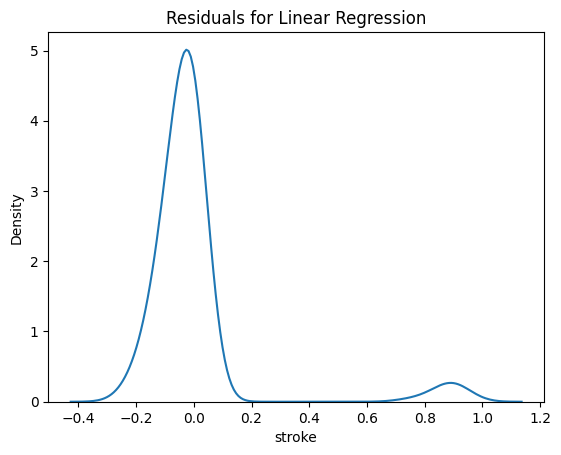

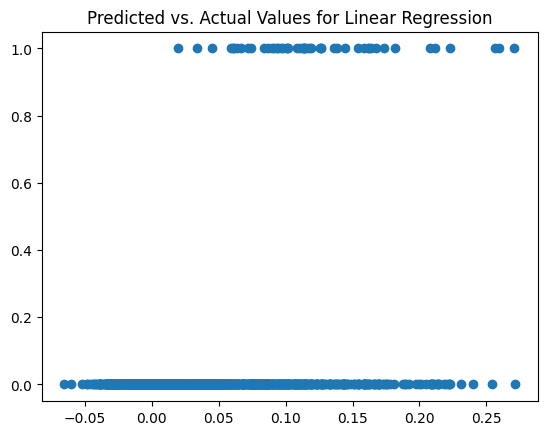

In [62]:
residuals = y_test - y_hat
sns.kdeplot(residuals)
plt.title("Residuals for Linear Regression")
plt.show()

plt.scatter(x=y_hat,y=y_test)
plt.title('Predicted vs. Actual Values for Linear Regression')
plt.show()

The polynomial expansion used below shows a degree two expansion of the variables 'age','heart_disease','avg_glucose_level_ihs','Residence_type','smoking_status'. The variable 'work_type' is kept as a dummy variable and concatenated with the expaned training set. The same process is applied to the test set. The variable 'bmi' is not included. One of our group members discussed how in a class she learned that recent research suggests BMI is not a good predictor of health. When it was cut out of the model, the results showed a lower RMSE so we kept it out. This linear regression model produced a R-squared of 0.0956 and a RMSE of 0.2050. While this model does not have a very predictive R-squared value, it has the lowest RMSE which is the goal of the project. We still explored other options, shown below, but this model has the lowest RMSE of any combined model considered.

In [114]:
# Now this is a linear model with polynomial expansion
# We found that degree 2 gave the best results

X_train_numeric = X_train.loc[:,['age','heart_disease','avg_glucose_level_ihs','Residence_type','smoking_status'] ]

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True)],axis=1)

Z_train = pd.concat([continuous,dummies],axis=1)
Z_train.columns = Z_train.columns.astype(str)
X_test_numeric = X_test.loc[:,['age','heart_disease','avg_glucose_level_ihs','Residence_type','smoking_status'] ]

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True)],axis=1)

Z_test = pd.concat([continuous,dummies],axis=1)

Z_test.columns = Z_test.columns.astype(str)
# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)

print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )

R2:  0.09563359799605275
RMSE:  0.2050397191782437


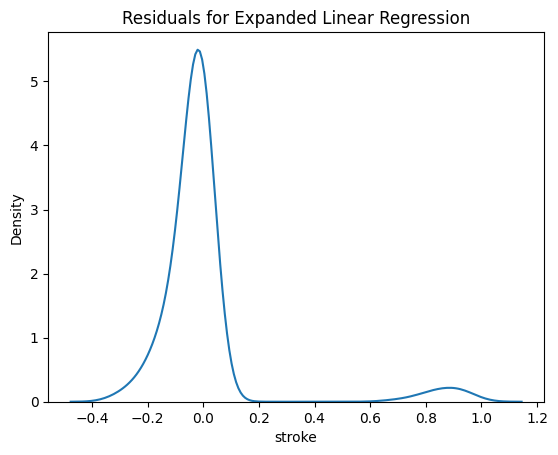

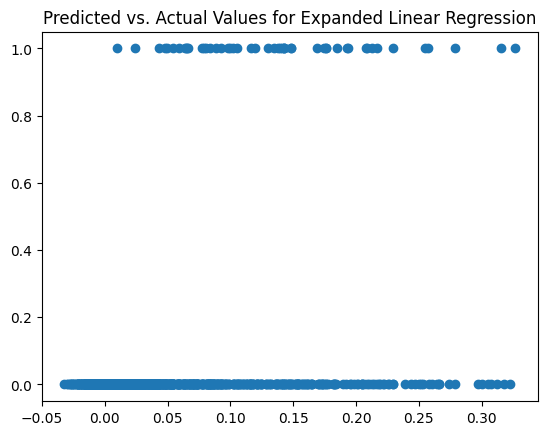

In [64]:
# computes the residuals and plots the curve
residuals = y_test - y_hat
sns.kdeplot(residuals)
plt.title("Residuals for Expanded Linear Regression")
plt.show()

# this plot shows the difference between predicted and actual values
plt.scatter(x=y_hat,y=y_test)
plt.title('Predicted vs. Actual Values for Expanded Linear Regression')
plt.show()

As the expanded model produced good results for the linear model, it is used again in this model. They are still called 'Z_train' and 'Z_test'. The model below is the corrected KNN classifier model. The variable 'stroke' is only contained in the y_train and y_test variables. The k for this model was chosen as 9 to minimize SSE. This model did not beat the previous linear model as the RMSE is 0.2233. As discussed earlier, the goal of this project is to minimize RMSE, not maximize R-square or balance the two. As such even though the R-squared of this model is 0.9501 it is not the best model for our project.

In [148]:
# This is the KNeighborsClassifer model with 9 neighbors
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(Z_train,y_train)
y_hat = fitted_model.predict(Z_test)

In [149]:
r_squared = model.score(Z_test, y_test)
print(f'R-squared: {r_squared}')

# Calculate RMSE
y_hat = model.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )

R-squared: 0.9501466275659824
RMSE:  0.2232786878186487


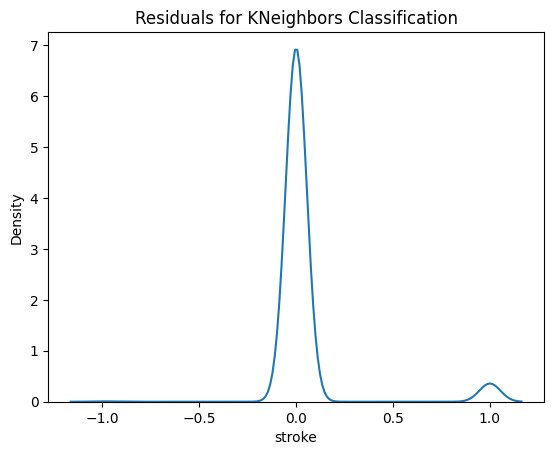

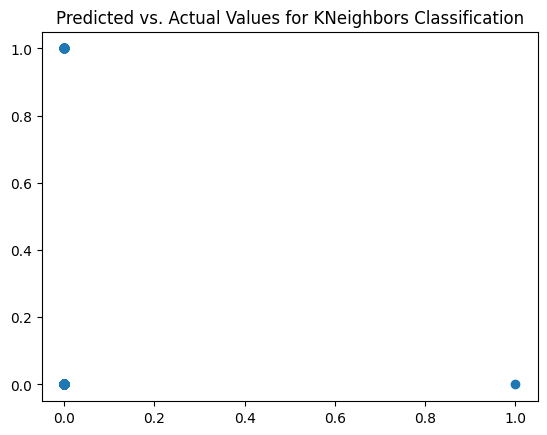

In [150]:
residuals = y_test - y_hat
sns.kdeplot(residuals)
plt.title("Residuals for KNeighbors Classification")
plt.show()

plt.scatter(x=y_hat,y=y_test)
plt.title('Predicted vs. Actual Values for KNeighbors Classification')
plt.show()

The final model attempted using our combined technique is the KNN regressor. The expanded training and testing data was still used here. This model also normalized the data before plotting the skree plot. This plot shows the optimal k value is 5 because this is where the elbow occurs on the skree plot. When a k value of 5 is used the R-squared is 0.0708 and the RMSE is 0.2078. As such, this is not the best model produced.

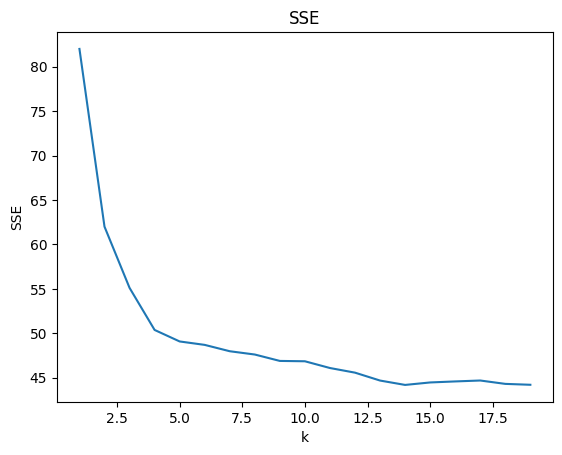

In [153]:
# Finally, the best model KNeighbors regressor.
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = Z_train.apply(maxmin)
X_test_knn = Z_test.apply(maxmin)

# Determine optimal k:
k_bar = 20
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()
# The plot shows that the best values for k is 5!

## Fit optimal model:
model = KNeighborsRegressor(n_neighbors=max(5,k_star))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

In [154]:
TSS = np.sum( (y_test - y_test.mean())**2 )
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N
RMSE_knn = (SSE_knn/N)**(1/2)
R2_knn = 1 - SSE_knn/TSS
print("R^2:", R2_knn)
print("RMSE:", RMSE_knn)

R^2: 0.0708095098265411
RMSE: 0.2078347516145799


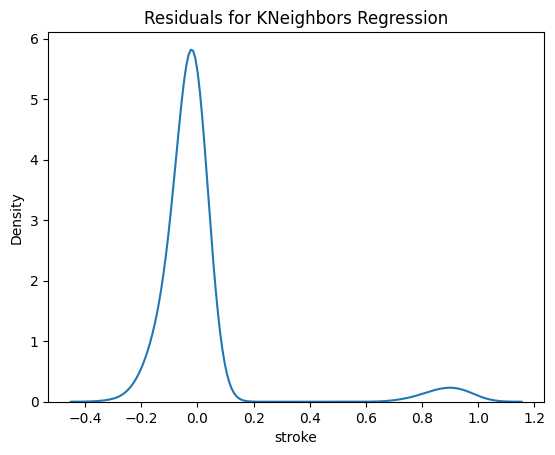

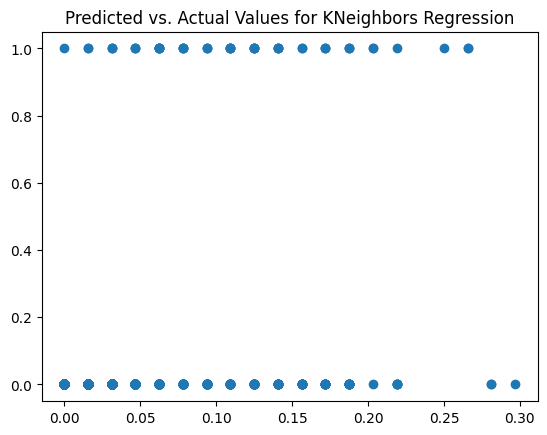

In [139]:
residuals_knn = y_test - y_hat_knn
sns.kdeplot(residuals_knn)
plt.title("Residuals for KNeighbors Regression")
plt.show()

plt.scatter(x=y_hat_knn,y=y_test)
plt.title('Predicted vs. Actual Values for KNeighbors Regression')
plt.show()

**Conclusion**

In conclusion, we attempted to approach this problem through a variety of perspectives, rather than agreeing on one method and attempting it once. Throughout this class, we have learned that it is important to examine data from multiple angles, especially when it is sensitive information such as predicting strokes. Somebody may see a variable as useless, while another person might see it as the most significant one. Our approach towards creating the best possible model followed basic rules - get multiple opinions, and do not be afraid to create a model that fails. As you could tell from some of our individual models, we did not achieve a lower RMSE and higher R-squared than a basic linear model. This was a part of our process, figuring out what worked, and adapting to create a better model on our next attempt.

Our individual models included expanded linear regression models and KNN. For a linear regression model with expanded polynomials, both degrees of 2 and 3, the outputs had an R-squared of 0.078 and RMSE of 0.207. This was not better than the base linear regression model. When accounting for outliers, the R-squared decreased further, while the RMSE increased. This indicated that accounting for outliers was not going to help us create a better model. The next model, the classification tree, was proven to dramatically overfit the data. This gave us evidence that the classification tree was not useful, and we chose to move to the next individual model. KNN did not perform better than any of the other models. Due to none of our models being better than the basic linear regression model on its own, we chose to combine the models (as we figured it couldn’t get worse). Our final model gave us an R-squared of 0.0956 and RMSE of 0.2050397191782437. This model was the linear regression model with polynomial expansion. While this model does not have the highest R-squared, the goal of the model was to reduce the RMSE. If there was a different motivation for the model, we might want to select one of the KNN models.

The varied and diverse approach to the way we created our final model is the reason that we are confident in its ability, and safe from criticism. By getting several outlooks on what the best model would be, we tested virtually every method that we learned in this class. This allowed us to see the data from multiple angles, which prevents mistakes that pertain to close-mindedness and oversight. In addition, we all individually cleaned the data, then chose which variables would be best to use. Again, having multiple people clean the data prevents oversight and data cleaning errors. We are confident that we were able to remove the NaNs and successfully convert our variables into dummy variables. While critics may be worried that we did not arrive at the correct results, due to many of our models failing, we agree to disagree. We were able to learn from our failures, and argue that a model failing provides just as much information as a model that succeeds.

If we had the time, and motivation, we would have loved to use ensemble methods on our supermodel and see how good of a fit we could come up with. Particularly, we are interested in the effect that bagging would have had. We could have used bagging to combine all of our models into one mega-model, instead of picking and choosing parts of different individual models. It would be very interesting to see if these methods could save our model from being worse than basic linear regression - especially since in a real world scenario these methods would likely be used.